<a href="https://www.kaggle.com/code/jaybhavsar28/notebooka3c271bf18?scriptVersionId=165829834" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install split-folders

  Obtaining dependency information for split-folders from https://files.pythonhosted.org/packages/b6/d5/307d63c03356bad6e141d8718d3f4116f51bd9c4b09e2614ffcee1f3c6fd/split_folders-0.5.1-py3-none-any.whl.metadata


**Importing Lib**

In [3]:
import numpy as np
import pandas as pd
import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

import os
import plotly.express as px
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:


class_names = ['cyst', 'normal', 'tumor', 'stone']

# Assuming the dataset is in '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/'
base_path = '/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'

cyst_path = os.path.join(base_path, 'Cyst')
normal_path = os.path.join(base_path, 'Normal')
stone_path = os.path.join(base_path, 'Stone')
tumor_path = os.path.join(base_path, 'Tumor')

cyst_count = len(os.listdir(cyst_path))
normal_count = len(os.listdir(normal_path))
stone_count = len(os.listdir(stone_path))
tumor_count = len(os.listdir(tumor_path))

print(f'Cyst count: {cyst_count}')
print(f'Normal count: {normal_count}')
print(f'Stone count: {stone_count}')
print(f'Tumor count: {tumor_count}')


Cyst count: 3709
Normal count: 5077
Stone count: 1377
Tumor count: 2283


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


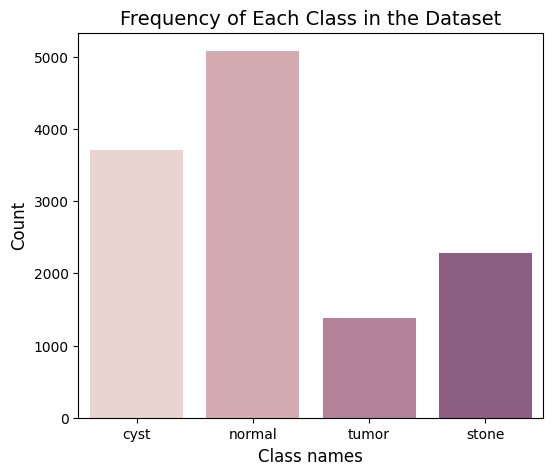

In [5]:
images = [cyst_count, normal_count, stone_count, tumor_count]

plt.figure(figsize=(6,5))
sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette())
plt.title('Frequency of Each Class in the Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)))
plt.show()
px.pie(names= class_names, values= images, color_discrete_sequence=px.colors.sequential.BuGn)


In [6]:
splitfolders.ratio(
    "../input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
   output="./dataset",
   ratio=(.8,.1,.1)
)

Copying files: 12446 files [01:22, 150.02 files/s]


In [7]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
val = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('./dataset/train',
                                          target_size=(180, 180),
                                          color_mode='grayscale',
                                          class_mode = 'categorical',
                                          batch_size=64
                                         )

test_dataset = test.flow_from_directory('./dataset/test',
                                        target_size=(180, 180),
                                        color_mode='grayscale',
                                        class_mode = 'categorical',                                  
                                        batch_size=64,
                                        shuffle = False
                                       )

valid_dataset = val.flow_from_directory('./dataset/val',
                                        target_size=(180, 180),
                                        color_mode='grayscale',
                                        class_mode = 'categorical',
                                        batch_size=64
                                       )

Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


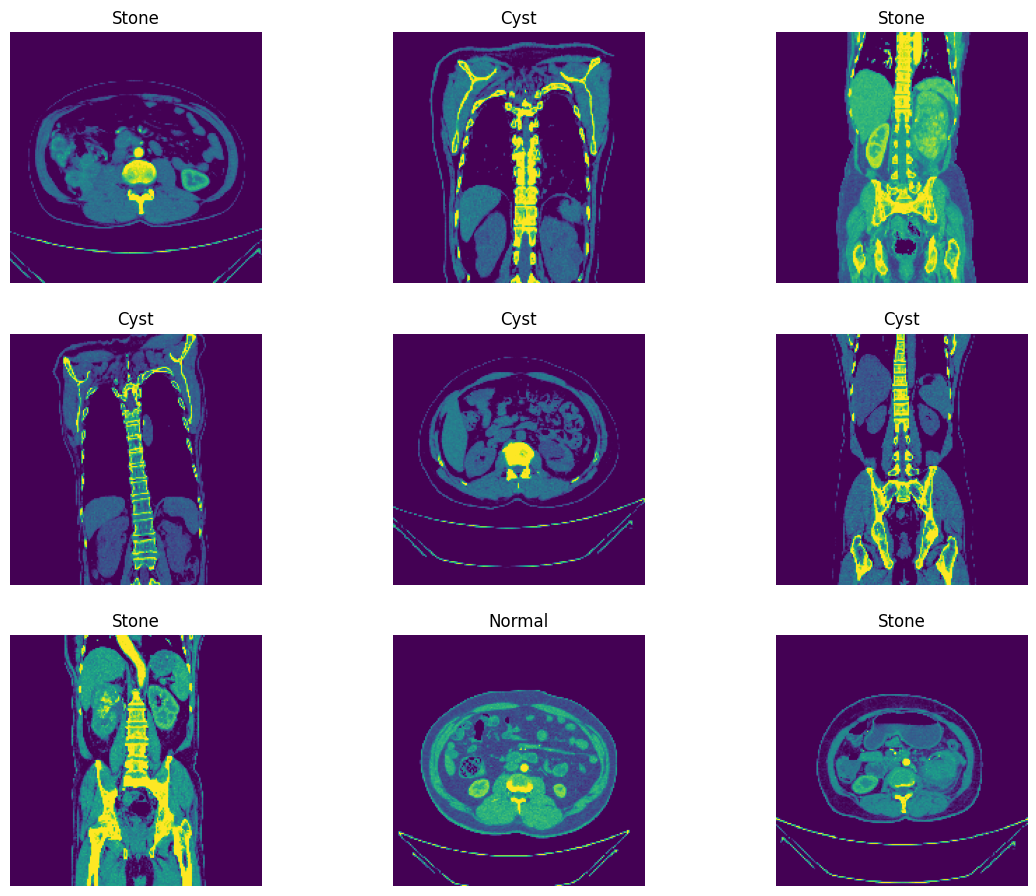

In [8]:
class_names = ['Cyst', 'Normal', 'Tumor', 'Stone'] 
def class_type(dataset, n_images):

    i = 1
    images, labels = dataset.next()
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        plt.title(class_names[np.argmax(label)])
        plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()
class_type(train_dataset, 10)

In [9]:
inputs = keras.Input(shape=(180,180,1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu')(x)
outputs = layers.Dense(4, activation='softmax')(x)
model = keras.Model(inputs = inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 84, 84, 128)       73856     
                                                             

In [10]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 
                                                                                   keras.metrics.Precision(name='precision'),
                                                                                   keras.metrics.Recall(name='recall')])
history = model.fit(train_dataset,
          validation_data=valid_dataset,
          epochs=3
         )


Epoch 1/3
156/156 [==============================] - 57s 294ms/step - loss: 1.2775 - accuracy: 0.4282 - precision: 0.5790 - recall: 0.0997 - val_loss: 1.0152 - val_accuracy: 0.6014 - val_precision: 0.6380 - val_recall: 0.5548
Epoch 2/3
156/156 [==============================] - 41s 259ms/step - loss: 0.7100 - accuracy: 0.7336 - precision: 0.7933 - recall: 0.6405 - val_loss: 0.5508 - val_accuracy: 0.7850 - val_precision: 0.8206 - val_recall: 0.7585
Epoch 3/3
156/156 [==============================] - 40s 255ms/step - loss: 0.0983 - accuracy: 0.9676 - precision: 0.9703 - recall: 0.9647 - val_loss: 0.0068 - val_accuracy: 0.9968 - val_precision: 0.9968 - val_recall: 0.9968


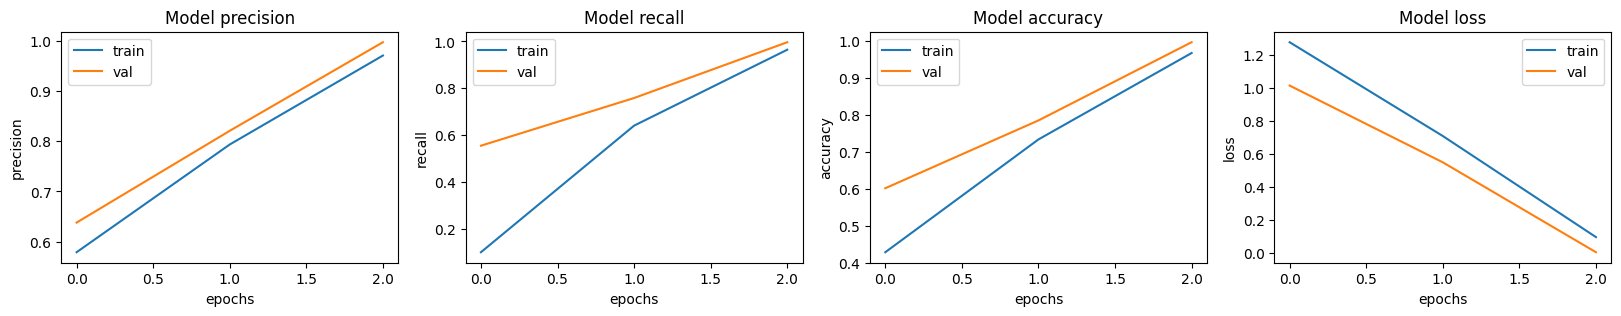

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [12]:
predictions = model.predict(test_dataset)
model.evaluate(test_dataset)

20/20 [==============================] - 4s 211ms/step - loss: 0.0067 - accuracy: 0.9976 - precision: 0.9976 - recall: 0.9976


[0.006748252082616091,
 0.9975980520248413,
 0.9975980520248413,
 0.9975980520248413]

2/2 [==============================] - 2s 5ms/step


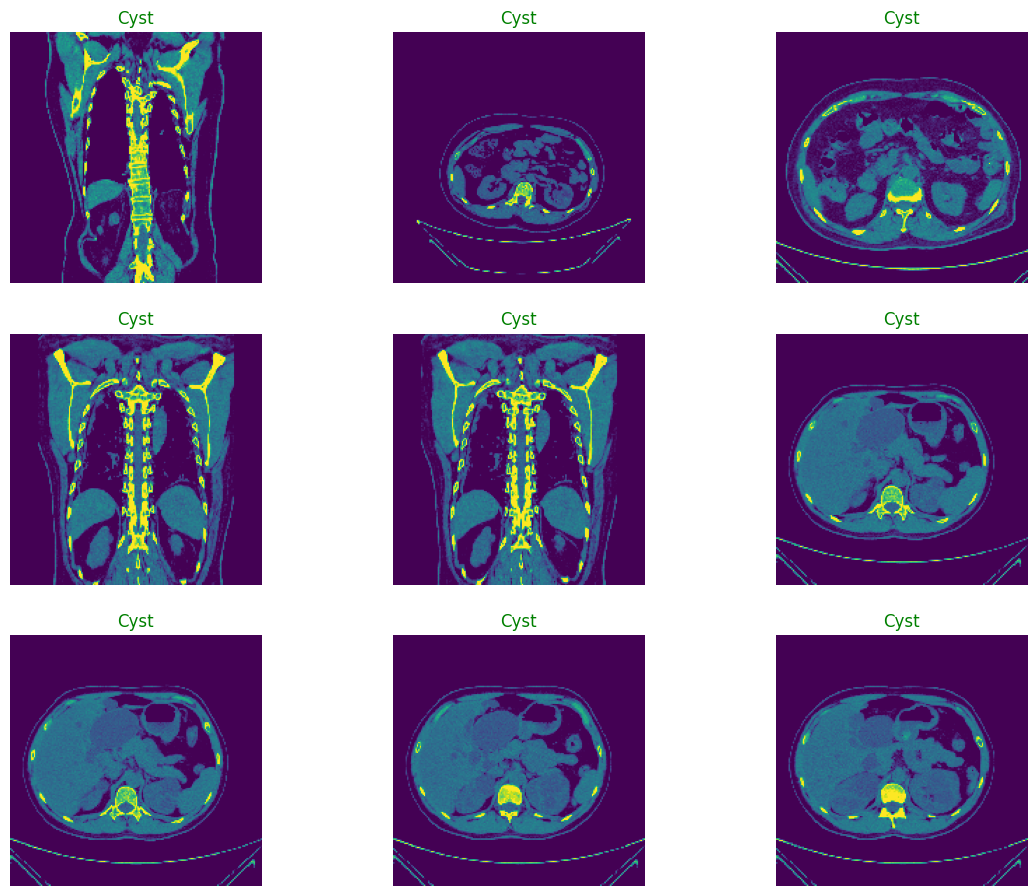

In [13]:
def class_prediction(dataset, n_images):
    i = 1
    images, labels = dataset.next()

    preds = model.predict(images)
    predictions = np.argmax(preds, axis=1)
    labels = np.argmax(labels, axis= 1)
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g') 
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images:
            break
    plt.show()

class_prediction(test_dataset, 10)

Accuracy: 0.9975980784627703
Precision: 0.994718309859155
Recall: 0.997983870967742
F1_score: 0.9963188151051047


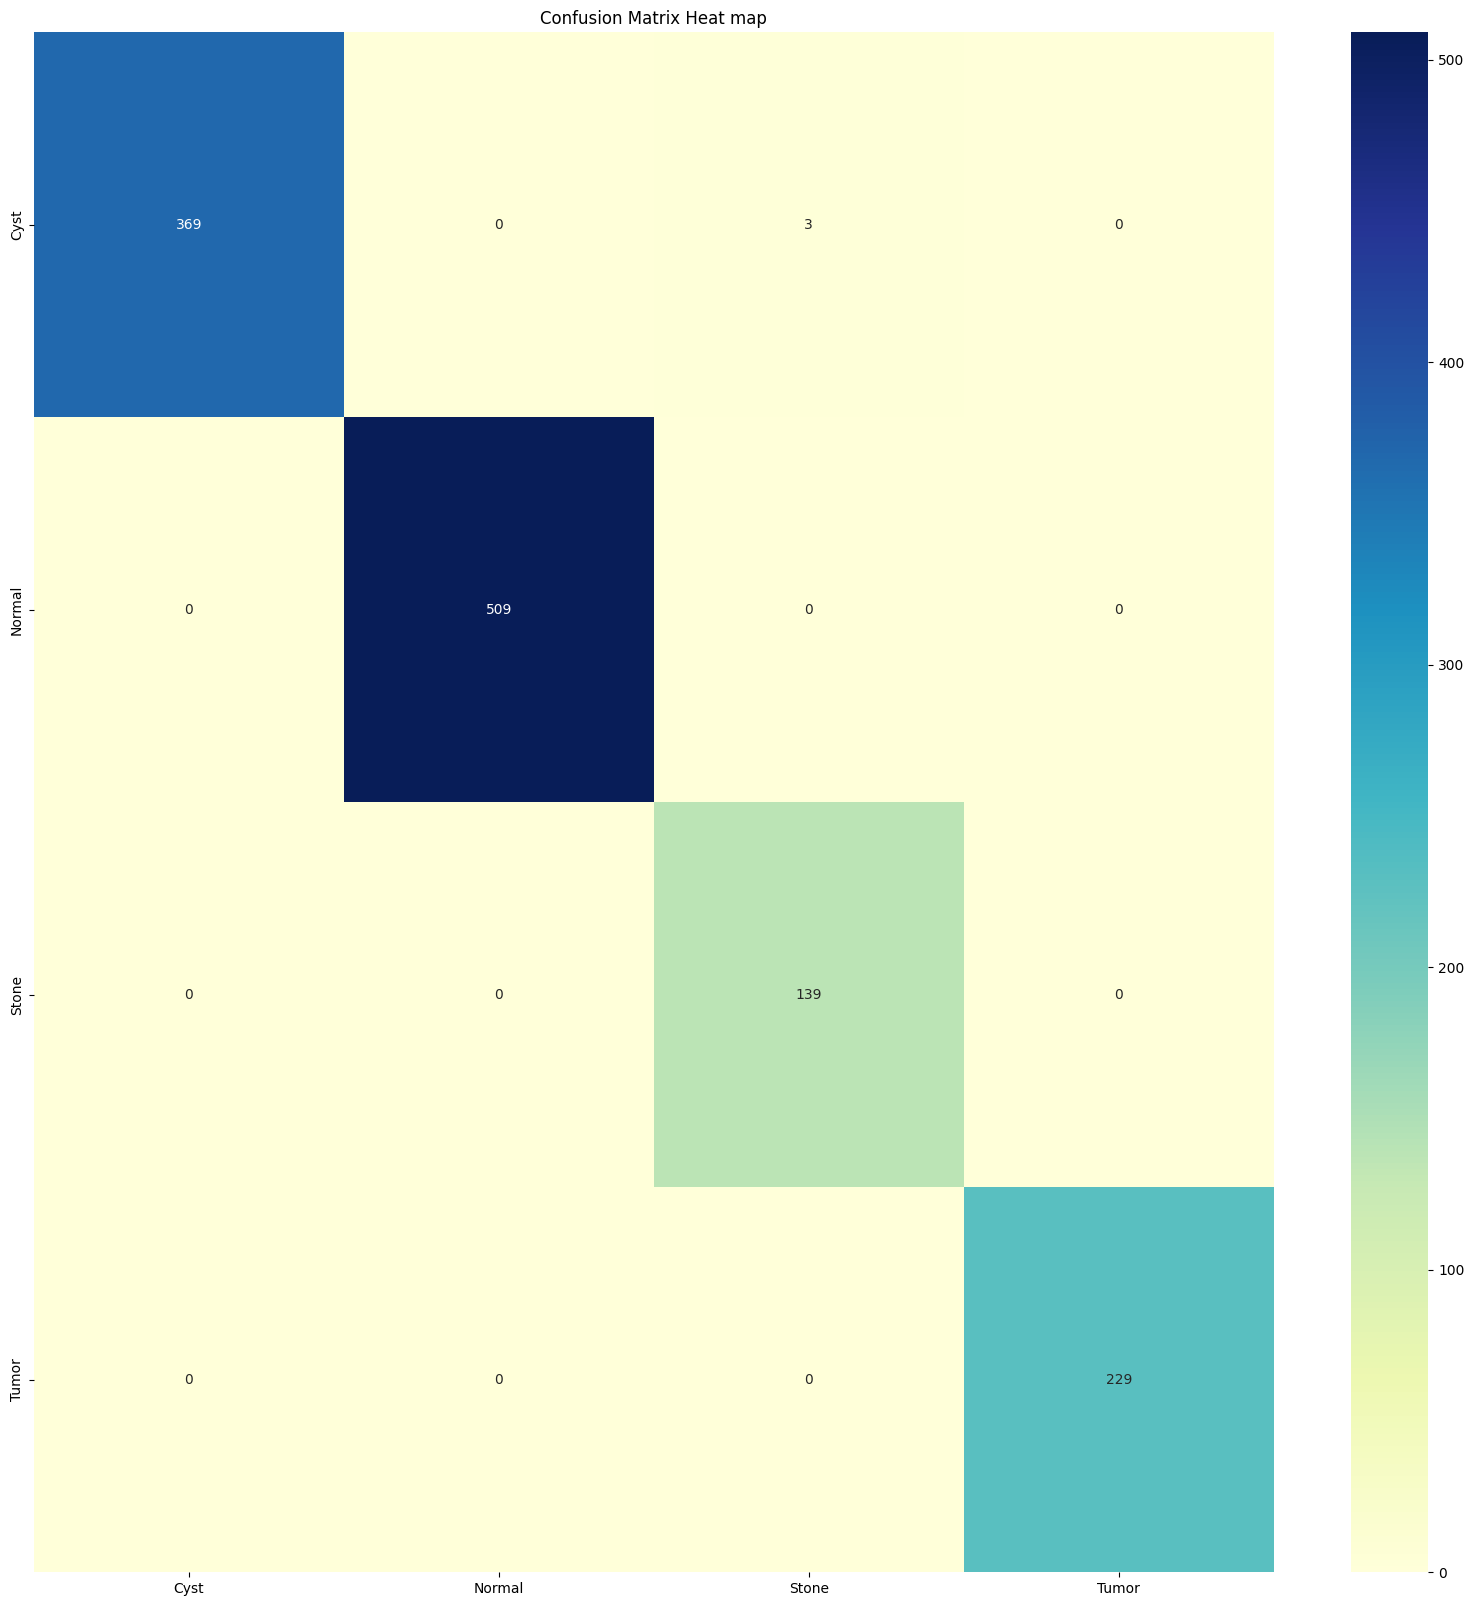

In [14]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')
  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()
    
evaluate(test_dataset.classes, predictions)


In [15]:
from tensorflow.keras.models import load_model
model.save('saved_models/subscribe')





In [16]:
!ls  # List files in the current working directory
!ls saved_models  # List files in the 'saved_models' directory
!ls saved_models/subscribe  # List files in the 'subscribe' directory


__notebook__.ipynb  dataset  saved_models
subscribe
assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables
